# [CDAF] Atividade 1

## Nome e matrícula
Nome: Arthur Pontes Nader
Matrícula: 2019022294

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [2]:
df = pd.read_excel('TrainingSet_2023_02_08.xlsx')

In [3]:
df_gols = df[["HS", "AS", "GD"]].copy()
df_gols["TG"] = df_gols["HS"] + df_gols["AS"]
df_gols

,HS,AS,GD,TG
0,1,0,1,1
1,4,1,3,5
2,4,0,4,4
3,2,2,0,4
4,0,1,-1,1
...,...,...,...,...
299209,-1,-1,0,-2
299210,-1,-1,0,-2
299211,-1,-1,0,-2
299212,-1,-1,0,-2


In [4]:
df_gols = df_gols[(df_gols['HS'] >= 0) & (df_gols['AS'] >= 0)]
df_gols

,HS,AS,GD,TG
0,1,0,1,1
1,4,1,3,5
2,4,0,4,4
3,2,2,0,4
4,0,1,-1,1
...,...,...,...,...
299203,1,2,-1,3
299204,0,1,-1,1
299205,2,0,2,2
299206,2,0,2,2


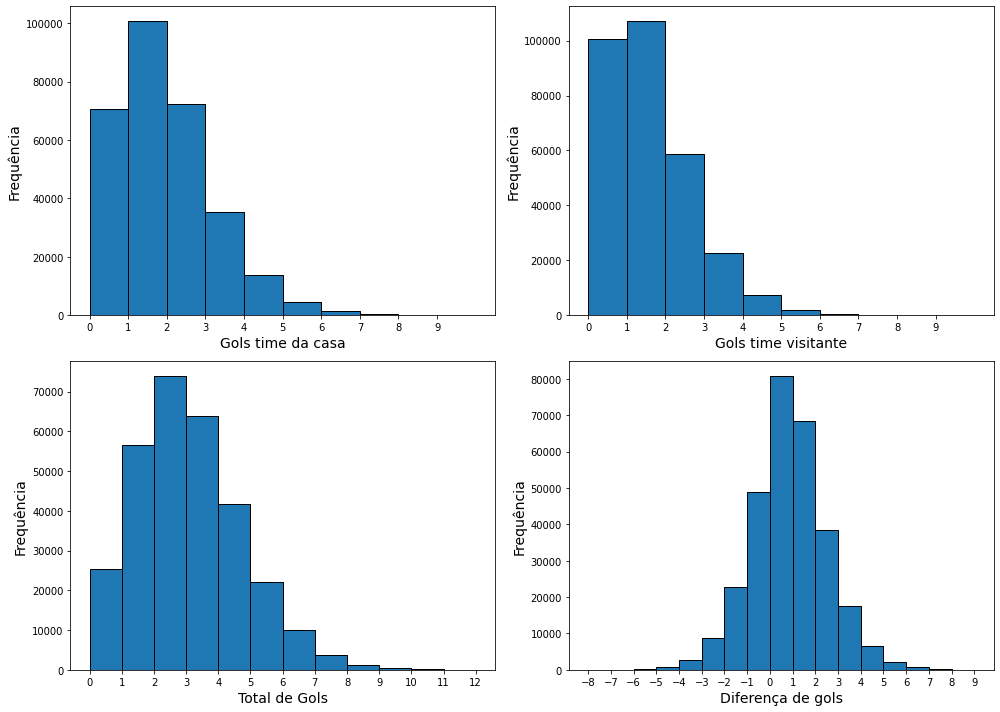

In [5]:
fig, axs = plt.subplots(2, 2, figsize = (14,10))

axs[0, 0].hist(df_gols["HS"], range = (0, 10), edgecolor = "black")
axs[0, 0].set_xlabel("Gols time da casa", fontsize = 14)
axs[0, 0].set_ylabel("Frequência", fontsize = 14)
axs[0, 0].set_xticks(ticks = [x for x in range(10)])
axs[0, 0].set_title("", fontsize = 16)

axs[0, 1].hist(df_gols["AS"], range = (0, 10), edgecolor = "black")
axs[0, 1].set_xlabel("Gols time visitante", fontsize = 14)
axs[0, 1].set_ylabel("Frequência", fontsize = 14)
axs[0, 1].set_xticks(ticks = [x for x in range(10)])
axs[0, 1].set_title("", fontsize = 16)

axs[1, 0].hist(df_gols["TG"], bins = [x for x in range(13)], range = (0, 13), edgecolor = "black")
axs[1, 0].set_xlabel("Total de Gols", fontsize = 14)
axs[1, 0].set_ylabel("Frequência", fontsize = 14)
axs[1, 0].set_xticks(ticks = [x for x in range(13)])
axs[1, 0].set_title("", fontsize = 16)

axs[1, 1].hist(df_gols["GD"], [x for x in range(-8,10)], range = (-8, 10), edgecolor = "black")
axs[1, 1].set_xlabel("Diferença de gols", fontsize = 14)
axs[1, 1].set_ylabel("Frequência", fontsize = 14)
axs[1, 1].set_xticks(ticks = [x for x in range(-8,10)])
axs[1, 1].set_title("", fontsize = 16)

fig.tight_layout()
plt.show()

In [6]:
print("Gols marcados pelo time da casa:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols["HS"].min(), df_gols["HS"].max(), df_gols["HS"].mean()))
print("Gols marcados pelo time visitante:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols["AS"].min(), df_gols["AS"].max(), df_gols["AS"].mean()))
print("Total de gols:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols["TG"].min(), df_gols["TG"].max(), df_gols["TG"].mean()))
print("Diferenca de gols: \nMinimo = %d\nMaximo = %d\nMedia = %f" %(df_gols["GD"].min(), df_gols["GD"].max(),df_gols["GD"].abs().mean()))

Gols marcados pelo time da casa:
Minimo = 0
Maximo = 13
Media = 1.471700

Gols marcados pelo time visitante:
Minimo = 0
Maximo = 13
Media = 1.121441

Total de gols:
Minimo = 0
Maximo = 15
Media = 2.593141

Diferenca de gols: 
Minimo = -13
Maximo = 12
Media = 1.266033


## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

In [7]:
df["Lge"].unique()

array(['GER1', 'ENG1', 'ENG2', 'ENG3', 'ENG4', 'ITA1', 'ITA2', 'HOL1',
       'SCO1', 'SCO2', 'SCO3', 'SCO4', 'SPA1', 'SPA2', 'FRA1', 'FRA2',
       'BEL1', 'GRE1', 'POR1', 'ARG1', 'RUS1', 'CHN1', 'AUS1', 'CHE1',
       'SWE1', 'AUT1', 'DNK1', 'GER2', 'MEX1', 'ISR1', 'FIN1', 'BRA1',
       'JPN1', 'KOR1', 'ZAF1', 'CHL1', 'ENG5', 'NZL1', 'DZA1', 'MAR1',
       'TUN1', 'ECU1', 'VEN1', 'GER3', 'NOR1', 'USA1', 'FRA3', 'RUS2',
       'USA2', 'BRA2', 'JPN2'], dtype=object)

In [8]:
df_esp08 = df[(df["Sea"] == "08-09") & (df["Lge"] == "SPA1")]

df_gols_esp = df_esp08[["HS", "AS", "GD"]].copy()
df_gols_esp["TG"] = df_esp08["HS"] + df_esp08["AS"]
df_gols_esp = df_gols_esp[(df_gols_esp['HS'] >= 0) & (df_gols_esp['AS'] >= 0)]
df_gols_esp

,HS,AS,GD,TG
87091,1,0,1,1
87092,3,0,3,3
87093,1,3,-2,4
87094,4,0,4,4
87095,0,1,-1,1
...,...,...,...,...
87466,3,0,3,3
87467,0,2,-2,2
87468,2,1,1,3
87469,1,1,0,2


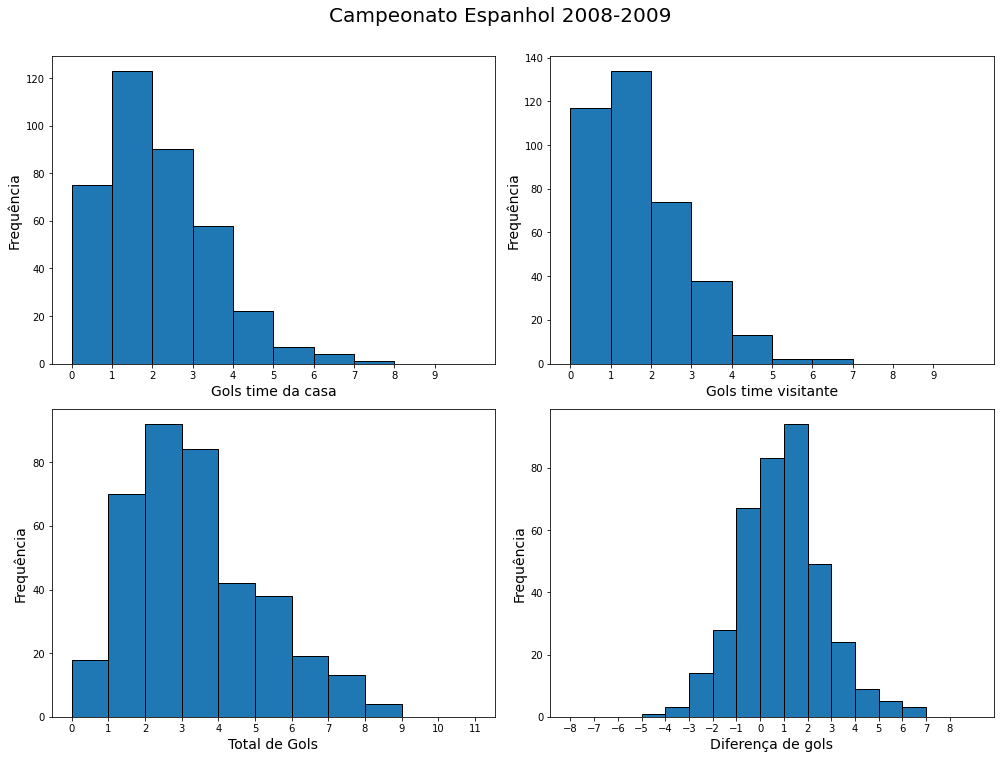

In [9]:
fig, axs = plt.subplots(2, 2, figsize = (14,10))

axs[0, 0].hist(df_gols_esp["HS"], range = (0, 10), edgecolor = "black")
axs[0, 0].set_xlabel("Gols time da casa", fontsize = 14)
axs[0, 0].set_ylabel("Frequência", fontsize = 14)
axs[0, 0].set_xticks(ticks = [x for x in range(10)])
axs[0, 0].set_title("", fontsize = 16)

axs[0, 1].hist(df_gols_esp["AS"], range = (0, 10), edgecolor = "black")
axs[0, 1].set_xlabel("Gols time visitante", fontsize = 14)
axs[0, 1].set_ylabel("Frequência", fontsize = 14)
axs[0, 1].set_xticks(ticks = [x for x in range(10)])
axs[0, 1].set_title("", fontsize = 16)

axs[1, 0].hist(df_gols_esp["TG"], bins = [x for x in range(12)], range = (0, 12), edgecolor = "black")
axs[1, 0].set_xlabel("Total de Gols", fontsize = 14)
axs[1, 0].set_ylabel("Frequência", fontsize = 14)
axs[1, 0].set_xticks(ticks = [x for x in range(12)])
axs[1, 0].set_title("", fontsize = 16)

axs[1, 1].hist(df_gols_esp["GD"], [x for x in range(-8,10)], range = (-8, 10), edgecolor = "black")
axs[1, 1].set_xlabel("Diferença de gols", fontsize = 14)
axs[1, 1].set_ylabel("Frequência", fontsize = 14)
axs[1, 1].set_xticks(ticks = [x for x in range(-8,9)])
axs[1, 1].set_title("", fontsize = 16)

fig.tight_layout()
fig.suptitle("Campeonato Espanhol 2008-2009", fontsize = 20, y = 1.05)
plt.show()

In [10]:
print("Gols marcados pelo time da casa:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols_esp["HS"].min(), df_gols_esp["HS"].max(), df_gols_esp["HS"].mean()))
print("Gols marcados pelo time visitante:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols_esp["AS"].min(), df_gols_esp["AS"].max(), df_gols_esp["AS"].mean()))
print("Total de gols:\nMinimo = %d\nMaximo = %d\nMedia = %f\n" %(df_gols_esp["TG"].min(), df_gols_esp["TG"].max(), df_gols_esp["TG"].mean()))
print("Diferenca de gols: \nMinimo = %d\nMaximo = %d\nMedia = %f" %(df_gols_esp["GD"].min(), df_gols_esp["GD"].max(),df_gols_esp["GD"].abs().mean()))

Gols marcados pelo time da casa:
Minimo = 0
Maximo = 7
Media = 1.660526

Gols marcados pelo time visitante:
Minimo = 0
Maximo = 6
Media = 1.236842

Total de gols:
Minimo = 0
Maximo = 8
Media = 2.897368

Diferenca de gols: 
Minimo = -5
Maximo = 6
Media = 1.381579


Há diferenças bem sutis nos histogramas. No campeonato espanhol, há tendência do time da casa marcar mais gols, o que é perceptivel pelo maior nível das barras que indicam a frequência de 2 e 3 gols. No geral, essas barras ficam mais baixas quando se considera todos os campeonatos. Outra coisa que da pra notar é que, enquanto no conjunto de dados inteiro há mais partidas com 0 gols do que com 6, no Campeonato Espanhol da temporada de 2008-2009 houveram mais partidas com 6 gols do que partidas com 0. Assim, pode-se dizer que o Campeonato Espanhol é uma liga mais ofensiva quando comparada com todo o restante.

## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

In [11]:
df_esp08

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
87091,08-09,SPA1,30/08/2008,Espanyol Barcelona,Valladolid,1,0,1,W
87092,08-09,SPA1,30/08/2008,Valencia,Mallorca,3,0,3,W
87093,08-09,SPA1,31/08/2008,Athletic Bilbao,Almeria,1,3,-2,L
87094,08-09,SPA1,31/08/2008,Athletico Madrid,Malaga,4,0,4,W
87095,08-09,SPA1,31/08/2008,Real Betis,Recreativo,0,1,-1,L
...,...,...,...,...,...,...,...,...,...
87466,08-09,SPA1,31/05/2009,Espanyol Barcelona,Malaga,3,0,3,W
87467,08-09,SPA1,31/05/2009,Numancia,Sevilla FC,0,2,-2,L
87468,08-09,SPA1,31/05/2009,Osasuna,Real Madrid,2,1,1,W
87469,08-09,SPA1,31/05/2009,Santander,Getafe,1,1,0,D


In [12]:
df_times = df_esp08["HT"].unique()
df_times

array(['Espanyol Barcelona', 'Valencia', 'Athletic Bilbao',
       'Athletico Madrid', 'Real Betis', 'La Coruna', 'Numancia',
       'Osasuna', 'Santander', 'Sporting Gijon', 'FC Barcelona',
       'Valladolid', 'Almeria', 'Getafe', 'Malaga', 'Mallorca',
       'Real Madrid', 'Recreativo', 'Sevilla FC', 'Villarreal'],
      dtype=object)

In [13]:
def atualizar_classificacao(resultados, tabela, rodadas):
    
    for i in range(rodadas*10):
        linha = resultados.iloc[i]
        if linha["WDL"] == "W":
            tabela.loc[linha["HT"]]["Pontos"] +=3
            tabela.loc[linha["HT"]]["Vitorias"] +=1
            tabela.loc[linha["AT"]]["Derrotas"] +=1
        elif linha["WDL"] == "L":
            tabela.loc[linha["AT"]]["Pontos"] +=3
            tabela.loc[linha["AT"]]["Vitorias"] +=1
            tabela.loc[linha["HT"]]["Derrotas"] +=1
        else:
            tabela.loc[linha["HT"]]["Pontos"] +=1
            tabela.loc[linha["AT"]]["Pontos"] +=1
            tabela.loc[linha["HT"]]["Empates"] +=1
            tabela.loc[linha["AT"]]["Empates"] +=1
            
        tabela.loc[linha["HT"]]["Gols marcados"] += linha["HS"]
        tabela.loc[linha["HT"]]["Gols sofridos"] += linha["AS"]
        tabela.loc[linha["AT"]]["Gols marcados"] += linha["AS"]
        tabela.loc[linha["AT"]]["Gols sofridos"] += linha["HS"]
        tabela.loc[linha["HT"]]["Total de jogos"] +=1
        tabela.loc[linha["AT"]]["Total de jogos"] +=1
        
    tabela["Saldo"] = tabela["Gols marcados"] - tabela["Gols sofridos"]
    tabela = tabela.sort_values(["Pontos", "Vitorias", "Saldo", "Gols marcados"], ascending = False)
        
    return tabela

In [14]:
df_classificacao = pd.DataFrame(data = np.zeros((20,8), dtype = np.int32), 
                                index = df_times, 
                                columns = ["Pontos", "Vitorias", "Empates", "Derrotas", "Total de jogos", 
                                            "Gols marcados", "Gols sofridos", "Saldo"])

In [15]:
atualizar_classificacao(df_esp08, df_classificacao, 38)

,Pontos,Vitorias,Empates,Derrotas,Total de jogos,Gols marcados,Gols sofridos,Saldo
FC Barcelona,87,27,6,5,38,105,35,70
Real Madrid,78,25,3,10,38,83,52,31
Sevilla FC,70,21,7,10,38,54,39,15
Athletico Madrid,67,20,7,11,38,80,57,23
Villarreal,65,18,11,9,38,61,54,7
Valencia,62,18,8,12,38,68,54,14
La Coruna,58,16,10,12,38,48,47,1
Malaga,55,15,10,13,38,55,59,-4
Mallorca,51,14,9,15,38,53,60,-7
Espanyol Barcelona,47,12,11,15,38,46,49,-3


In [16]:
df_meia_temporada = pd.DataFrame(data = np.zeros((20,8), dtype = np.int32), 
                                index = df_times, 
                                columns = ["Pontos", "Vitorias", "Empates", "Derrotas", "Total de jogos", 
                                            "Gols marcados", "Gols sofridos", "Saldo"])

In [17]:
atualizar_classificacao(df_esp08, df_meia_temporada, 19)

,Pontos,Vitorias,Empates,Derrotas,Total de jogos,Gols marcados,Gols sofridos,Saldo
FC Barcelona,50,16,2,1,19,59,13,46
Real Madrid,38,12,2,5,19,41,27,14
Sevilla FC,38,11,5,3,19,28,16,12
Valencia,34,10,4,5,19,38,27,11
Villarreal,33,9,6,4,19,32,25,7
Athletico Madrid,31,9,4,6,19,42,30,12
Malaga,31,9,4,6,19,31,27,4
La Coruna,30,9,3,7,19,23,27,-4
Athletic Bilbao,26,7,5,7,19,27,29,-2
Santander,25,6,7,6,19,21,23,-2


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn
from scipy.stats import poisson,skellam

In [22]:
df_resultados = df_esp08[["HT", "AT", "HS", "AS"]].copy()

In [23]:
df_resultados = df_resultados.rename(columns={"HT": "HomeTeam", "AT": "AwayTeam", 'HS': 'HomeGoals', 'AS': 'AwayGoals'})

In [25]:
goal_model_data = pd.concat([df_resultados[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df_resultados[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1108.5
Date:                Wed, 12 Apr 2023   Deviance:                       815.69
Time:                        21:02:54   Pearson chi2:                     710.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1736
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.1105      0.202      0.547      0.585      -0.286       0.507
team[T.Athletic Bilbao]            0.0446      0.209      0.213      0.831      -0.365       0.454
team[T.Athletico Madrid]           0.5734      0.187      3.072      0.002       0.208       0.939
team[T.Espanyol Barcelona]         0.0106      0.210      0.051      0.960      -0.401       0.422
team[T.FC Barcelona]               0.8247      0.178      4.622      0.000       0.475       1.174
team[T.Getafe]                     0.1008      0.206      0.490      0.624      -0.302       0.504
team[T.La Coruna]                  0.0514      0.208      0.247      0.805      -0.356       0.459
team[T.Malaga]                     0.1993      0.201      0.990      0.322      -0.195       0.594
team[T.Mallorca]                   0.1631      0.203      0.804      0.422      -0.235       0.561
team[T.Numancia]                  -0.1618      0.221     -0.734      0.463      -0.594       0.270
team[T.Osasuna]                   -0.1065      0.216     -0.493      0.622      -0.530       0.317
team[T.Real Betis]                 0.1226      0.205      0.599      0.549      -0.279       0.524
team[T.Real Madrid]                0.6055      0.185      3.266      0.001       0.242       0.969
team[T.Recreativo]                -0.2847      0.227     -1.252      0.211      -0.730       0.161
team[T.Santander]                  0.0730      0.207      0.353      0.724      -0.332       0.478
team[T.Sevilla FC]                 0.1618      0.202      0.801      0.423      -0.234       0.558
team[T.Sporting Gijon]             0.0610      0.209      0.292      0.770      -0.348       0.470
team[T.Valencia]                   0.4073      0.192      2.117      0.034       0.030       0.785
team[T.Valladolid]                 0.0192      0.210      0.091      0.927      -0.392       0.431
team[T.Villarreal]                 0.2983      0.197      1.516      0.129      -0.087       0.684
opponent[T.Athletic Bilbao]        0.0182      0.181      0.101      0.920      -0.336       0.372
opponent[T.Athletico Madrid]      -0.0340      0.185     -0.185      0.854      -0.396       0.328
opponent[T.Espanyol Barcelona]    -0.2186      0.192     -1.138      0.255      -0.595       0.158
opponent[T.FC Barcelona]          -0.4990      0.212     -2.350      0.019      -0.915      -0.083
opponent[T.Getafe]                -0.0810      0.185     -0.437      0.662      -0.444       0.282
opponent[T.La Coruna]             -0.2585      0.194     -1.330      0.183      -0.639       0.122
opponent[T.Malaga]                -0.0238      0.183     -0.130      0.896      -0.382       0.335
opponent[T.Mallorca]              -0.0089      0.182     -0.049      0.961      -0.366       0.348
opponent[T.Num

In [26]:
def simular_partida(home_team, away_team):

    #Predicao
    home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                           'home':1},index=[1]))
    away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                           'home':0},index=[1]))

    #Resultados
    home_goals=np.random.poisson(home_score_rate)
    away_goals=np.random.poisson(away_score_rate)
    
    return home_score_rate, away_score_rate, home_goals[0], away_goals[0]

In [30]:
home_team = 'FC Barcelona'
away_team = 'Athletico Madrid'

home_score_rate, away_score_rate, home_goals, away_goals = simular_partida(home_team, away_team)

print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))
print(home_team + ': ' + str(home_goals))
print(away_team + ': '  + str(away_goals))

FC Barcelona against Athletico Madrid expect to score: 1    3.305869
dtype: float64
Athletico Madrid against FC Barcelona expect to score: 1    1.203064
dtype: float64
FC Barcelona: 3
Athletico Madrid: 1


In [31]:
def simular_resultados(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

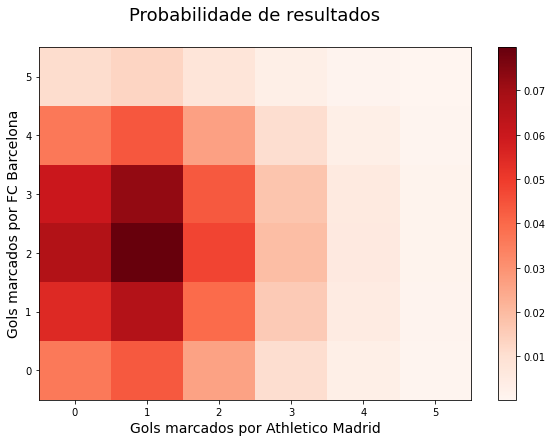

Vitoria do time da casa: 0.658954
Empate: 0.123123
Vitoria do time visitante: 0.098752



In [32]:
home_team = 'FC Barcelona'
away_team = 'Athletico Madrid'
max_goals=5
score_matrix=simular_resultados(poisson_model, home_team, away_team,max_goals)

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(1,1,1)
pos = ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probabilidade de resultados\n', fontsize = 18)
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Gols marcados por ' + away_team, fontsize = 14)
ax.set_ylabel('Gols marcados por ' + home_team, fontsize = 14)
plt.show()

home_win = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
away_win = np.sum(np.triu(score_matrix, 1))
print("Vitoria do time da casa: %f\nEmpate: %f\nVitoria do time visitante: %f\n" %(home_win, draw, away_win))

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?

In [33]:
df_esp08_simulacao = df_esp08.copy()
df_esp08_simulacao[['HS','AS','GD']] = 0
df_esp08_simulacao['WDL'] = ""

In [34]:
def simular_campeonato(df):
    
    for i, linha in df.iterrows():
        
        home_score_rate, away_score_rate, _, _ = simular_partida(linha["HT"], linha["AT"])
        
        if home_score_rate[1] - away_score_rate[1] < 0.5:
            num_gols = round((home_score_rate[1] - away_score_rate[1])/2)
            df.at[i, "HS"] = num_gols
            df.at[i, "AS"] = num_gols
            df.at[i, "WDL"] = "D"
        else:
            gols_casa = round(home_score_rate[1])
            gols_visitante = round(away_score_rate[1])
            
            if home_score_rate[1] > away_score_rate[1]:
                
                if gols_casa == gols_visitante:
                    gols_visitante -=1
                    
                df.at[i, "HS"] = gols_casa
                df.at[i, "AS"] = gols_visitante
                df.at[i, "GD"] = gols_casa - gols_visitante
                df.at[i, "WDL"] = "W"
            else:
                
                if gols_casa == gols_visitante:
                    gols_casa -= 1
                
                df.at[i, "HS"] = gols_casa
                df.at[i, "AS"] = gols_visitante
                df.at[i, "GD"] = gols_casa - gols_visitante
                df.at[i, "WDL"] = "L"
                
        
    df_classificacao = pd.DataFrame(data = np.zeros((20,8), dtype = np.int32), 
                                index = df["HT"].unique(),
                                columns = ["Pontos", "Vitorias", "Empates", "Derrotas", "Total de jogos", 
                                            "Gols marcados", "Gols sofridos", "Saldo"])
    df_final = atualizar_classificacao(df, df_classificacao, 38)
    
    return df_final

In [35]:
simular_campeonato(df_esp08_simulacao)

,Pontos,Vitorias,Empates,Derrotas,Total de jogos,Gols marcados,Gols sofridos,Saldo
FC Barcelona,76,19,19,0,38,43,4,39
Real Madrid,73,18,19,1,38,47,20,27
Athletico Madrid,68,16,20,2,38,42,21,21
Sevilla FC,68,16,20,2,38,30,16,14
Valencia,64,15,19,4,38,36,24,12
Villarreal,61,14,19,5,38,33,24,9
La Coruna,50,9,23,6,38,20,18,2
Santander,50,9,23,6,38,20,18,2
Malaga,48,8,24,6,38,21,22,-1
Espanyol Barcelona,44,6,26,6,38,14,15,-1


A primeira diferença notada é que o Barcelona não perdeu nenhuma vez e os dois ultimos colocados não ganharam nenhuma partida, o que é bem difícil de acontecer na realidade. O modelo simulado também possui diferenças significativas em relação à quantidade de gols marcados e sofridos. Esses números ficaram bem abaixo da realidade.
De modo geral, a classificação simulada ficou relativamente proxima da real, com apenas algumas diferenças de posições entre os times em relação à classificação oficial. O time campeão e o segundo colocado foram os mesmos.
Percebe-se que o modelo subestima o número de derrotas e superestima o número de empates, o que pode ser indicativo de que o valor de diferença esperada deve ser menor que 0.5 para se considerar que houve empate para que o modelo fique mais próximo da realidade.
Considerando-se as similaridades e diferenças levantadas, pode-se afirmar que o modelo subestima a qualidade ofensiva dos times e superestima a qualidade defensiva.